# Tutorial 4: Questionnarie Analysis using Python
**Date**: Feb 2022

**Background**

* Following the [Tolerant usecase], we are going to analyze the data that has been collected through a survey to assess tolerance for a sample of university students. Our definition of tolerance is _an attitude or state of mind towards difference_ and it identifies three different aspect of tolerance. Put simply, we incorporate the following factors to develop our measures of tolerance:
<p align=\"center\"><img src='./images/model.PNG' width="700"></p>



**Data and Methods**

* We measure tolerance in one big sample with 300 students. The data has been collected by means of self-questionnarie and we ask students' opinion about attitudes towards tolerance. Our survey also includes aquestions associated with prejudice, such attitudes towards immigrants and homosexuals. We also ask participants about their past experiences and general socio-demographic questions.

* To test whether three factor model of tolerance fits well our dataset, we are going to conduct a confirmatory factor analysis (CFA) as the most appropriate statistical modeling for such research question.

Here is a description of the variables in the dataset (`clean_tolerance.csv` file):

|id|variable   |description                                                                                                                                                     |
|------|-----------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
|1     |id         |annoymized unique identifier per individual                                                                                                                                                       |
|2     |age        |Age of student                                                                                                                                                             |
|3     |gender     |Gender (from 0 to 10)                                                                                                                                                         |
|4     |height     |Height (scale in cm, e.g. 183)                                                                                                                                  |
|5     |country    |Where are you come from? (Country)                                                                                                                              |
|6     |language   |How many language you speak at home to your family?                                                                                                             |
|7     |freq_travel|How many different countries have you lived in?                                                                                                                 |
|8     |past_exp   |Past intercultural experience: have you ever done one of the following international programs?                                                                  |
|9     |q1         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [People should have the right to live how they wish]|
|10    |q2         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [It is important that people have the freedom to live their life as they choose]     |
|11    |q3         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [ It is okay for people to live as they wish as long as they do not harm other people]                                    |
|12    |q4         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I respect other people’s beliefs and opinions]        |
|13    |q5         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I respect other people’s opinions even when I do not agree]   |
|14    |q6         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I like to spend time with people who are different from me]                                         |
|15    |q7         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I like people who challenge me to think about the world in a different way]                            |
|16    |q8         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [Society benefits from a diversity of traditions and lifestyles]                            |


**Today's challenge**

We aim to understand the relationship between questions and factors reflecting tolerance construct. Especially, we need to:

* Find out correlation between the variables
    * how many factors are there?
* strength of relationship between items and the factors
* Decide whether three factors to extract is feasible


## 1. Setup Library

In [ ]:
# import necessary libraries
# import pandas as pd

## 2. Import Data 

For this tutorial, we will be using the **cleaned version** of "tolerance survey dataset". 
The csv file that we will be using `clean_tolerance.csv` is available at [this link](./data/clean_tolerance.csv).

In [2]:
# read the data into dataframe
# df = pd.read_csv("https://raw.githubusercontent.com/MaastrichtU-IDS/global-studies/main/semester4/tutorial4/data/clean_tolerance.csv", sep=',')

## 3. Basic data understanding

In [7]:
# check how many variables and observations are in the dataset

In [ ]:
#how many participants are in the survey?

In [10]:
#print last 3 rows of the dataframe

In [25]:
#print the Age and Gender from participant 2

In case you don't know much about the survey data that is being analyzed, you can always check the scale of all the columns by looking for the `min`, `max`, and `unique value counts`. This will let you know if you need to rescale the data or not.

## 4. Identify data types
- Categorical or numerical?
- how to deal with different types of variables?
- why they matter? 
    - for example: `gender, age, height, q1`

In [28]:
# Check the data type of each variable

> Thinking: CHECK Variables 
> - **Height**: int64?
> - **Gender**: int64?
> - **Age**: float64?
> - **q1**: object

## 5. Analyzing Likert Scale survey questions

In [41]:
# how many participants did disagree with q1 and q2 questions? Look for value_counts() at pandas documentation: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [1]:
# convert the previous numbers into percentage

## 6. Visualizing all survey questions

In [44]:
# plot/visualise categorical variable such as Gender and q4
# https://nbviewer.org/github/MaastrichtU-IDS/global-studies/blob/main/semester2/notebooks/4.1-data-visualization.ipynb

---
## 7. Transform/Prepare the data

* Index ID column 
* Convert into Likert scale variables
* removing missing values (?=to be decided)
* discard unuseless variables (?)

---


In [38]:
# df.set_index("Timestamp", inplace=True)

---
* Convert into numerical Likert Scale

> why? Look at the last 5 rows. What do you notice?

In [47]:
df.tail(5)

,Timestamp,Age,Gender,"Height (scale in cm, e.g. 183)",Where are you come from? (Country),How many language you speak at home to your family?,How many different countries have you lived in?,Past intercultural experience: have you ever done one of the following international programs?,q1,q2,q3,q4,q5,q6,q7,q8
145,172,21.0,7,175,RU,1.0,4.0,Studying school abroad,NaN,NaN,Strongly Disagree,NaN,Agree,Disagree,Agree,Strongly Disagree
146,173,40.0,6,163,CN,1.0,1.0,Internship program,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Disagree,Strongly Disagree,Agree
147,174,NaN,5,182,AR,2.0,3.0,None,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Disagree,Disagree,Agree,Disagree
148,176,35.0,2,160,PH,1.0,3.0,Internship program,Strongly Agree,Strongly Disagree,NaN,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree
149,177,NaN,8,160,CN,5.0,2.0,Internship program,Strongly Agree,Strongly Agree,NaN,Strongly Disagree,Strongly Disagree,Agree,Disagree,NaN


We need to map likert scale options _(i.e.strongly agree)_ to numbers _(i.e. 5) as following:

In [114]:
# Answers with a scale of 1 to 5 with 1 being strongly Disagree and 5 strongly Agree)
df_1 = df.replace(['Strongly Agree','Agree'],
                  ['5','4'])
# check last 5 rows
df_1.tail(5)

,id,age,gender,height,country,language,freq_travel,past_exp,q1,q2,q3,q4,q5,q6,q7,q8
145,172,21.0,7,175,RU,1.0,4.0,Studying school abroad,NaN,NaN,Strongly Disagree,NaN,4,Disagree,4,Strongly Disagree
146,173,40.0,6,163,CN,1.0,1.0,Internship program,5,5,5,Disagree,4,Strongly Disagree,Strongly Disagree,4
147,174,NaN,5,182,AR,2.0,3.0,None,Strongly Disagree,Strongly Disagree,Strongly Disagree,4,Disagree,Disagree,4,Disagree
148,176,35.0,2,160,PH,1.0,3.0,Internship program,5,Strongly Disagree,NaN,Strongly Disagree,Strongly Disagree,Strongly Disagree,5,Strongly Disagree
149,177,NaN,8,160,CN,5.0,2.0,Internship program,5,5,NaN,Strongly Disagree,Strongly Disagree,4,Disagree,NaN


In [115]:
# Create a list with all replacement rules

As you can see, the data set has already been converted to numbers. But double check the data types with `dtypes`. If this has NOT been done on your dataset (dtypes is `object`), you will need to convert any text like "Strongly Agree", "Neutral", "Agree", etc. into a numeric format. In this dataset, 1 is very low and 5 is very high.


In [117]:
df_transformed.dtypes

id               int64
age            float64
gender           int64
height           int64
country         object
language       float64
freq_travel    float64
past_exp        object
q1              object
q2              object
q3              object
q4              object
q5              object
q6              object
q7              object
q8              object
dtype: object

In [120]:
# # convert dataset into type variables accordingly (perhaps exercice for students)

numerical_variables = ['q1','q2','q3','q4', 'q4', 'q5', 'q6', 'q7', 'q8']
df_transformed[numerical_variables] = df_transformed[numerical_variables].apply(pd.to_numeric)

In [121]:
df_transformed.dtypes

id               int64
age            float64
gender           int64
height           int64
country         object
language       float64
freq_travel    float64
past_exp        object
q1             float64
q2             float64
q3             float64
q4             float64
q5               int64
q6               int64
q7               int64
q8             float64
dtype: object

---
* removing missing values (NA)

We explore the missing values with heatmaps. Look at the following code and explain what it does before running

Text(0.5, 1.0, 'Missing values (NA) in the dataset')

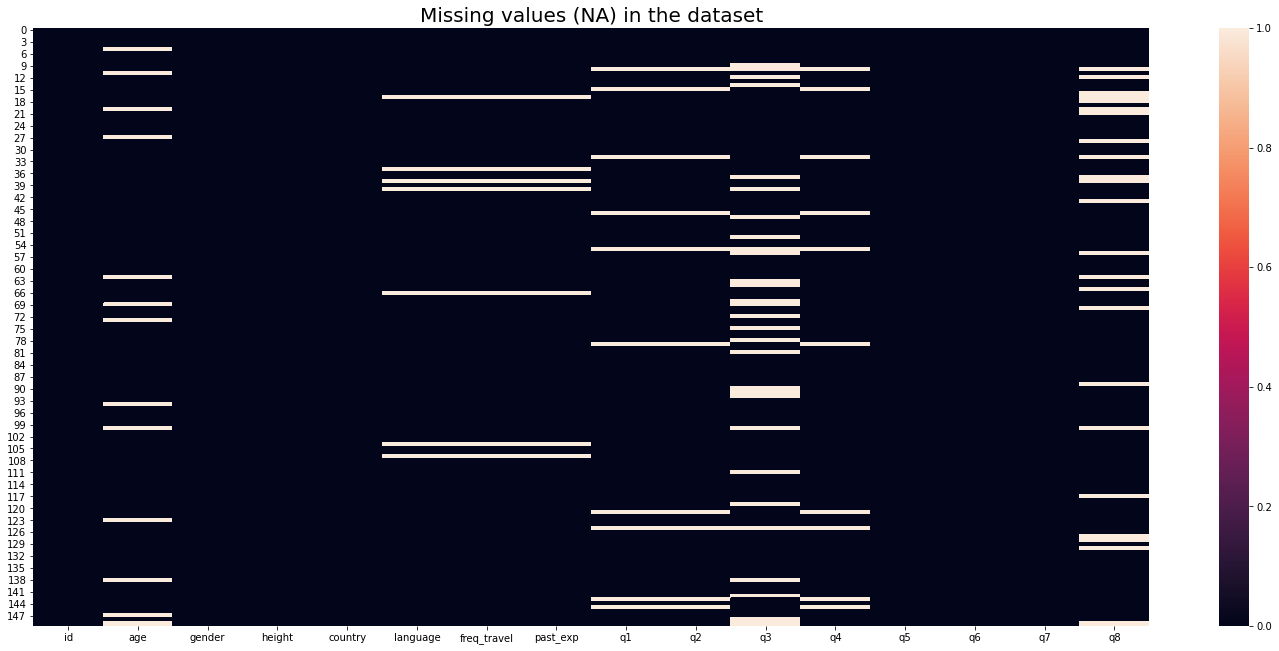

In [122]:
names = df_transformed.columns
plt.figure(figsize = (25,11))
sns.heatmap(df_transformed.isna().values, xticklabels=df_1.columns)
plt.title("Missing values (NA) in the dataset", size=20)

In [ ]:
# df_transformed.dropna(inplace=True)

* Discard unnecessary columns
    * Since we want to check three factor model, we can remove non-likert scale questions from further analysis. However, you could also include them in case you want to see how they interact with each other.

In [124]:
# Dropping unnecessary columns
df_transformed.drop(['id', # if index is not applicable
                     'age', 'gender',
                     'height',
                     'country',
                    'language',
                    'freq_travel',
                    'past_exp'],axis=1,inplace=True)
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q1      140 non-null    float64
 1   q2      140 non-null    float64
 2   q3      121 non-null    float64
 3   q4      140 non-null    float64
 4   q5      150 non-null    int64  
 5   q6      150 non-null    int64  
 6   q7      150 non-null    int64  
 7   q8      127 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 9.5 KB


## 8. Correlation matrix and interpretation

**Interpretation/discussion of which items/questions are the most representative for tolerance construct (based on correlation matrix)**

In [89]:
# calculate and interpret means/average of each likert scale question

In [ ]:
# calculate correlation matrix

In [91]:
# visualise correlation matrix

---
**Finish tutorial by discussing how many factors our model for CFA will be for the next tutorial**